## Imports

Please install any moduals listed here that you do not already have installed

In [10]:
import os
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Global Variables


In [11]:
# Paths to data files (images and meta data i.e. labels)
PROJECT_PATH   = '.'
META_DATA_PATH = f'{PROJECT_PATH}/data/train-metadata.csv'
IMAGE_DIR      = f'{PROJECT_PATH}/data/train-image/image/'

# Image file extention
IMAGE_FILE_EXT = '.jpg' 

DATA_SUBSET    = 5000

## Data Loading and Preproscessing

- It is assumed that the required data has been downloaded from https://www.kaggle.com/datasets/nischaydnk/isic-2020-jpg-256x256-resized and has been placed into the "./data/" directory
- We will then load in the images and lables from this directory
- To load in the images we will use 'imread' and then preform preprocessing to normalise and resize the samples

In [12]:
# Load the metadata file
metadata = pd.read_csv(META_DATA_PATH)

# Add the file extension to isic_id to match image filenames
metadata['image_file'] = metadata['isic_id'] + IMAGE_FILE_EXT

# Create a dictionary to map image filename to target class
image_to_label = dict(zip(metadata['image_file'], metadata['target']))

# Directory containing images
image_paths = [os.path.join(IMAGE_DIR, img) for img in os.listdir(IMAGE_DIR) if img in image_to_label]

# Check if all images were found in the metadata
print(f"Found {len(image_paths)} images out of {len(metadata)} labels in the metadata.")

Found 33126 images out of 33126 labels in the metadata.


In [13]:
# TESTING PURPOSES: use only a subset of the data
image_paths = image_paths[:DATA_SUBSET]

In [5]:
# Resize and normalize the images
def preprocess_images(paths, img_size=(256, 256)):
    images = []
    labels = []
    for path in paths:
        img = cv2.imread(path)
        if img is not None:
            img = cv2.resize(img, img_size)
            img = img / 255.0  # Normalize
            images.append(img)
            
            # Get the corresponding label for this image
            img_name = os.path.basename(path)
            labels.append(image_to_label[img_name])
    return np.array(images), np.array(labels)

# Preprocess the images and get labels
images, labels = preprocess_images(image_paths)

## Explortatory Analysis

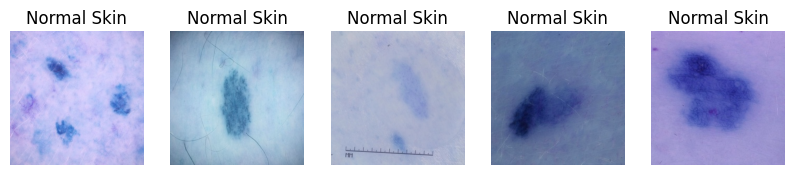

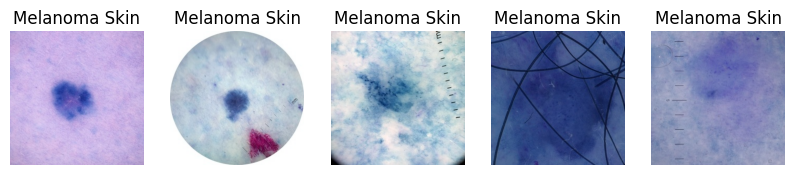

In [8]:
# Function to display images
def display_images(images, title, num_images=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(title)
        plt.axis('off')
    plt.show()

# Select 5 images from each class (normal and melanoma)
normal_images = images[labels == 0][:5]  # Assuming 0 is for normal skin
melanoma_images = images[labels == 1][:5]  # Assuming 1 is for melanoma

# Display images from both classes
display_images(normal_images, title="Normal Skin", num_images=5)
display_images(melanoma_images, title="Melanoma Skin", num_images=5)


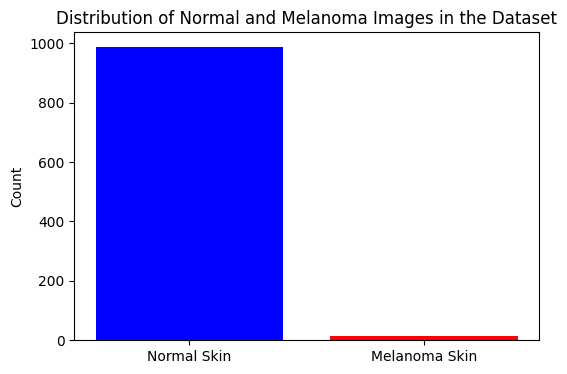

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Count occurrences of each class (0: normal, 1: melanoma)
unique, counts = np.unique(labels, return_counts=True)

# Calculate percentages
total = np.sum(counts)
percentages = counts / total * 100

# Plot the bar graph
plt.figure(figsize=(6, 4))
bars = plt.bar(unique, counts, color=['blue', 'red'])
plt.xticks([0, 1], ['Normal Skin', 'Melanoma Skin'])
plt.ylabel('Count')
plt.title('Distribution of Normal and Melanoma Images in the Dataset')

# Add count and percent on top of the bars
for bar, count, percent in zip(bars, counts, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(count)}\n({percent:.1f}%)', 
             ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()


## Data Train Test Split

In [ ]:
# Split the data into training and test sets
# Use stratified sampling to ensure classes are split evenly between the sets
train_paths, test_paths, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, stratify=labels)